In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [6]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [7]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

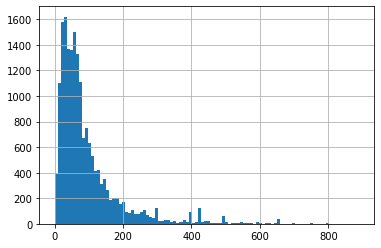

In [8]:
df['prices_amountmin'].hist(bins=100)

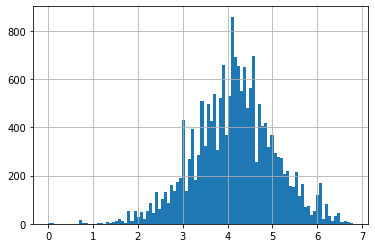

In [9]:
np.log(df['prices_amountmin']+1).hist(bins=100)

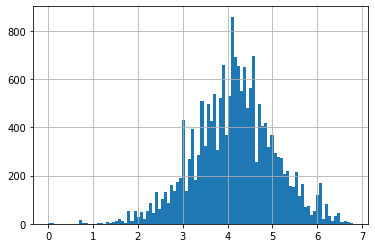

In [10]:
'lub'
np.log1p(df['prices_amountmin']).hist(bins=100)

In [11]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [12]:
y_true = df['prices_amountmin']
price_log_mean = np.exp(np.mean(np.log1p(y_true))) - 1
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
# Zaindeksowanie wartości z kolumny 'brand'
df['brand_cat'] = df['brand'].factorize()[0]

In [17]:
features = ['brand_cat']
X = df[features].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(features):
  X = df[features].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [21]:
run_model(features)

(-58.38655694633361, 4.223555478221712)

In [30]:
df['categories'].value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                                                                       3698
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                                                                       1632
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                                                                                     698
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                                                                              586
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                                                                                391
                                                                                          

In [0]:
df['categories_cat'] = df['categories'].factorize()[0]

In [32]:
features = ['categories_cat']
run_model(features)

(-59.82560591635895, 3.4214679298235415)

In [33]:
features = ['brand_cat', 'categories_cat']
run_model(features)

(-58.48960457872586, 6.135642974334121)

In [0]:
df['name_cat'] = df['name'].factorize()[0]

In [36]:
features = ['name_cat']
run_model(features)

(-62.80860350146927, 3.7143153110241443)

In [37]:
features = ['brand_cat', 'categories_cat', 'name_cat']
run_model(features)

(-61.64244701618651, 6.325007989863134)

In [0]:
df['color_cat'] = df['colors'].factorize()[0]

In [40]:
features = ['color_cat']
run_model(features)

(-62.72404880129134, 5.053649873215771)

In [42]:
features = ['brand_cat', 'categories_cat', 'color_cat', 'name_cat']
run_model(features)

(-61.00899249301945, 5.400622225113969)

In [43]:
df['sizes'].value_counts()

10                                                          266
11                                                          264
9                                                           233
12                                                          180
8                                                           167
                                                           ... 
13,10,11 M,12 M,7 M,8 M,9 M                                   1
10 W,10.5 M,10.5 W,11 M,11 W,12 M,13 M,8.5 M,9.5 M,9.5 W      1
11.5 11.5                                                     1
S,M                                                           1
10,11,8                                                       1
Name: sizes, Length: 1075, dtype: int64

In [0]:
df['sizes_cat'] = df['sizes'].factorize()[0]

In [47]:
features = ['sizes_cat']
run_model(features)

(-63.76881712833142, 3.780048659503436)

In [48]:
features = ['brand_cat', 'categories_cat', 'color_cat', 'name_cat', 'sizes_cat']
run_model(features)

(-61.01020255387532, 5.402570027577337)

In [49]:
!pwd


/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
!git add 